# UTS Penambangan Data dan Analisis Bisnis

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier


In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
data = pd.read_csv("data/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Eksplorasi Awal

### a. Berapa Jumlah total penumpang yang ada?

In [51]:
total_passengers = len(data)
print("Total passengers:", total_passengers)

Total passengers: 891


### b. Berapa jumlah penumpang yang selamat dan tidak selamat, Tampilkan dalam bentuk grafik?

          Status  Jumlah
0  Tidak Selamat     549
1        Selamat     342


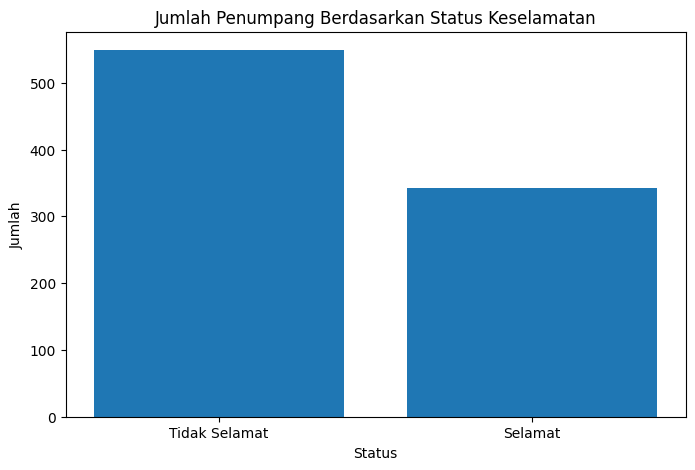

In [52]:
survival_counts = data['Survived'].value_counts()
survival_table = pd.DataFrame({
    'Status': ['Tidak Selamat', 'Selamat'],
    'Jumlah': [survival_counts[0], survival_counts[1]]
})
print(survival_table)

# Visualisasi hasil menggunakan grafik
plt.figure(figsize=(8, 5))
plt.bar(survival_table['Status'], survival_table['Jumlah'])
plt.title('Jumlah Penumpang Berdasarkan Status Keselamatan')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()   

### c. Berapa rata-rata umur penumpang? dan siapa penumpang termuda dan tertua?

In [53]:
average_age = data['Age'].mean()
youngest_passenger = data.loc[data['Age'].idxmin()]
oldest_passenger = data.loc[data['Age'].idxmax()]
print("Rata-rata umur penumpang:", average_age,"\n")
print("Identitas Penumpang Termuda:")
print(youngest_passenger,"\n")
print("Identitas Penumpang Tertua:")
print(oldest_passenger)

Rata-rata umur penumpang: 29.69911764705882 

Identitas Penumpang Termuda:
PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object 

Identitas Penumpang Tertua:
PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                           

### d. Berapakah jumlah penumpang berdasarkan jenis kelamin? Siapa yang paling banyak? Visualisasikan

  Jenis Kelamin  Jumlah
0          male     577
1        female     314
Jenis kelamin yang paling banyak: male


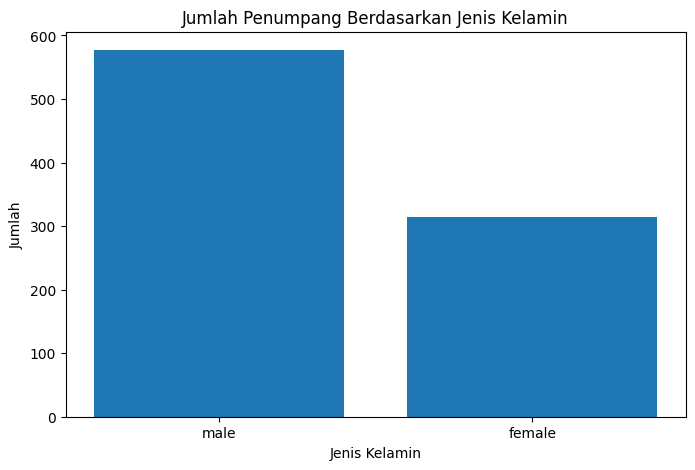

In [54]:
gender_counts = data['Sex'].value_counts()

gender_table = pd.DataFrame({
    'Jenis Kelamin': gender_counts.index,
    'Jumlah': gender_counts.values
})
print(gender_table)

gender_terbanyak = gender_counts.idxmax()
print(f"Jenis kelamin yang paling banyak: {gender_terbanyak}")

plt.figure(figsize=(8, 5))
plt.bar(gender_table["Jenis Kelamin"], gender_table["Jumlah"])
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

### e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualkan

Jumlah penumpang di kelas 1: 216
Jumlah penumpang di kelas 2: 184
Jumlah penumpang di kelas 3: 491


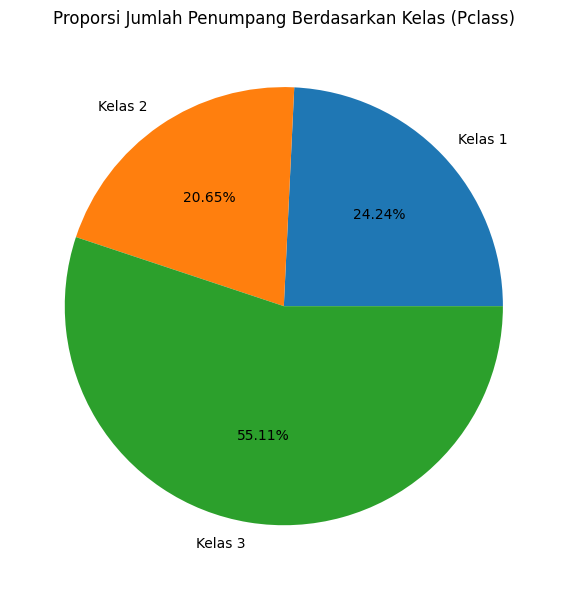

In [55]:
pclass_counts = data['Pclass'].value_counts().sort_index()
for i in pclass_counts.index:
    print(f"Jumlah penumpang di kelas {i}:", pclass_counts[i])

plt.figure(figsize=(12, 6))
plt.pie(pclass_counts, labels=[f"Kelas {i}" for i in pclass_counts.index], autopct='%1.2f%%')
plt.title('Proporsi Jumlah Penumpang Berdasarkan Kelas (Pclass)')
plt.tight_layout()
plt.show()

### 2. Pre-Processing

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Mengatasi missing value 

##### a. Apakah terdapat missing value pada data tersebut?

In [57]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### b. Jika ya, apa anda dilakukan?

##### Menangani data hilang pada kolom age dengan imputasi mean

In [58]:
data['Age'] = data['Age'].fillna(np.mean(data['Age']))

##### Menghapus data hilang pada kolom embarked

In [59]:
data.dropna(subset=['Embarked'], inplace=True)

##### Menghapus kolom cabin

In [60]:
data.drop('Cabin', axis=1, inplace=True)

##### Mengecek ulang data hilang dalam dataset

In [61]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### c. Apakah terdapat outlier pada data tersebut? jelaskan apa itu outlier!

Boxplot untuk cek outlier

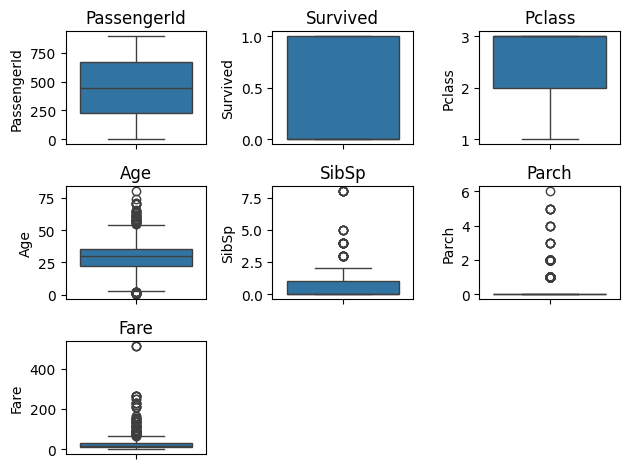

In [62]:

for i, col in enumerate(data.select_dtypes(include=["integer", "float"]).columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

##### Melihat data outlier pada kolom fare

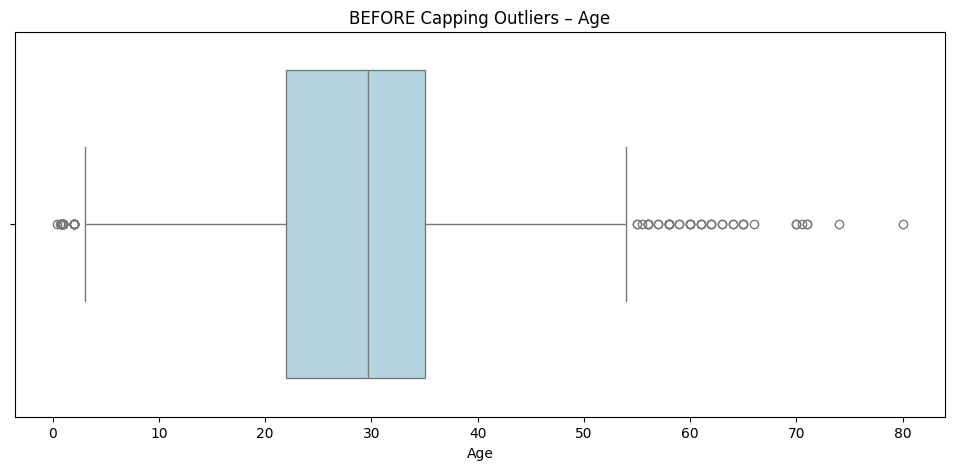

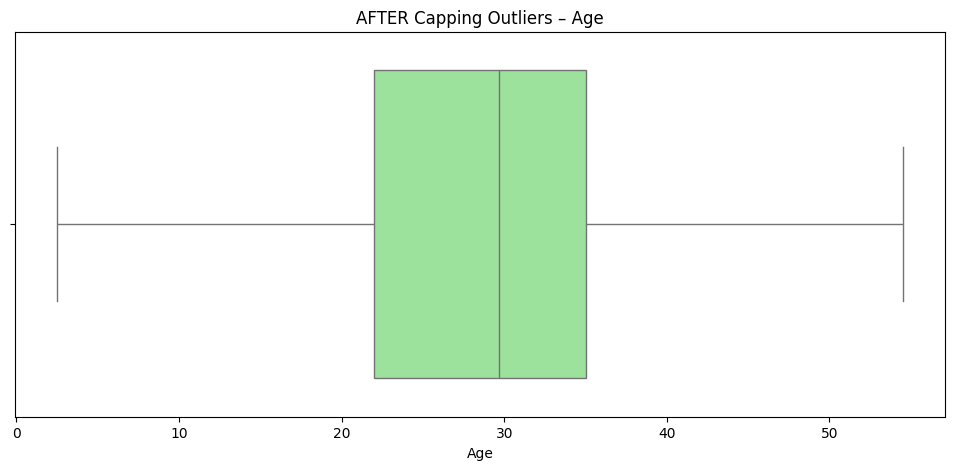

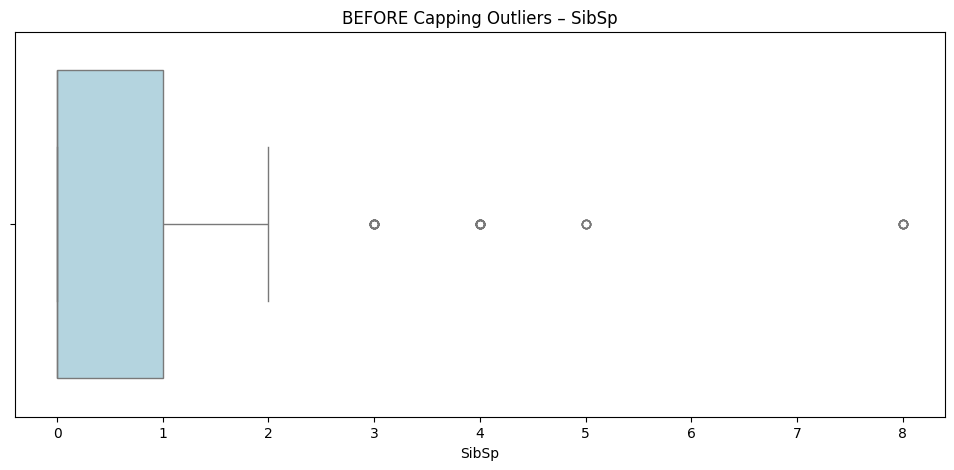

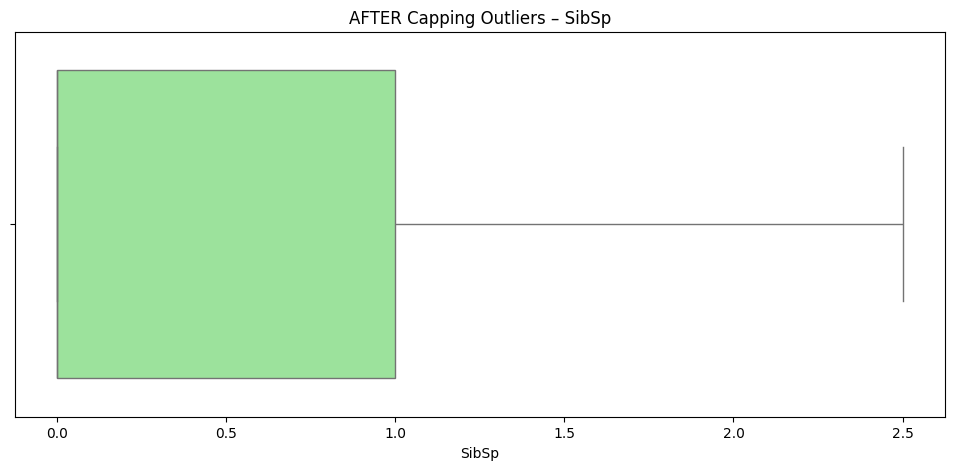

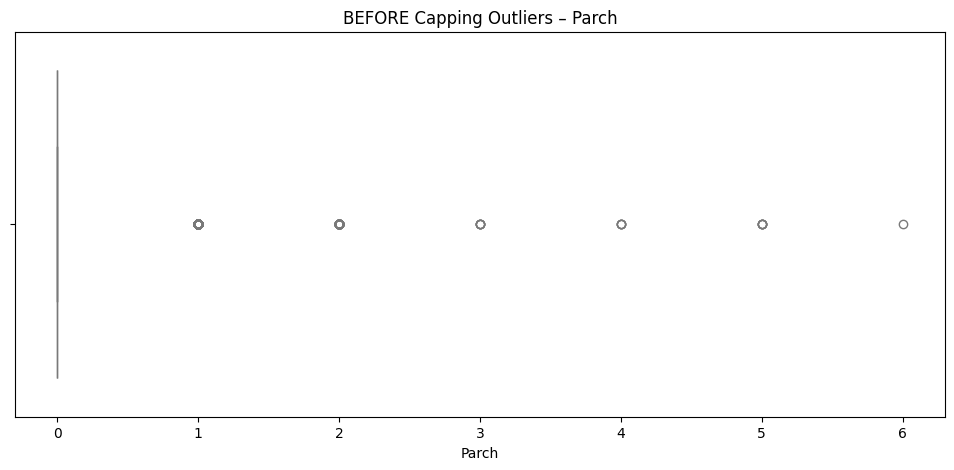

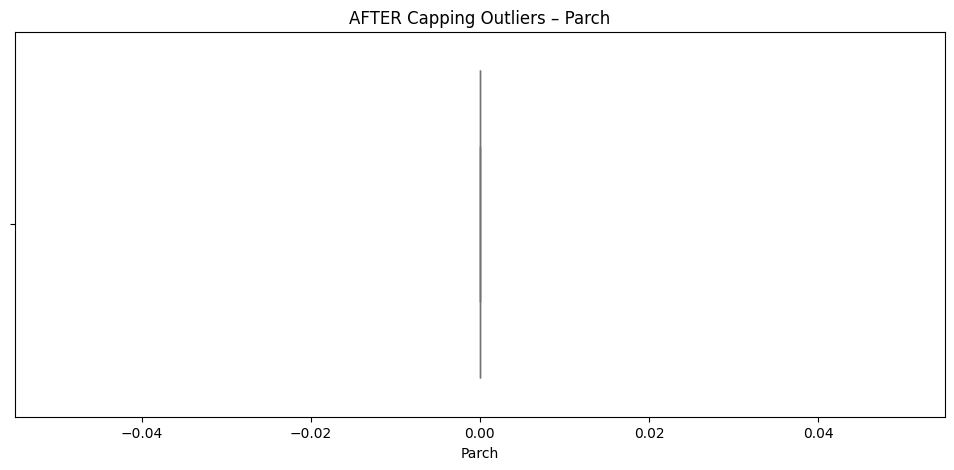

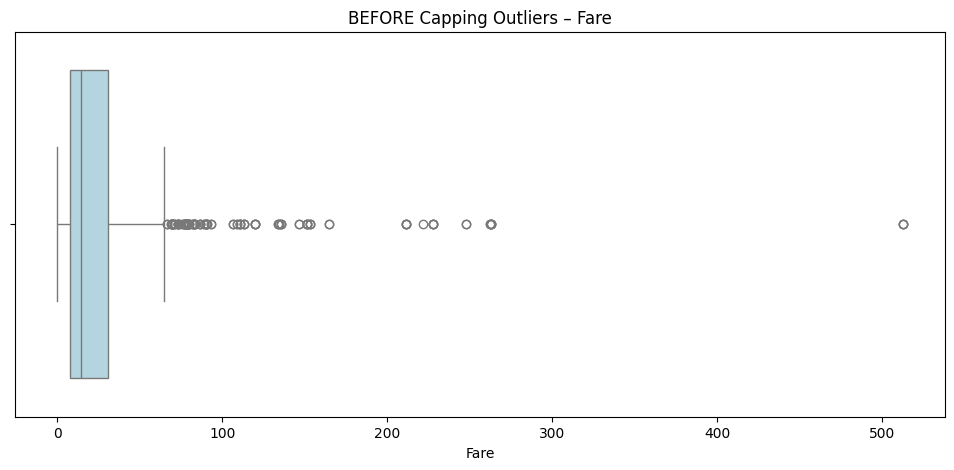

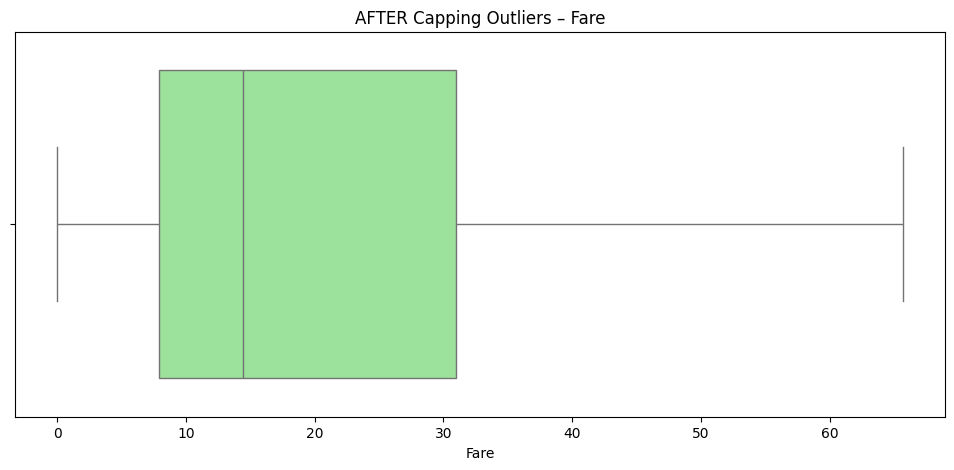

In [63]:
outlier_cols = ['Age', 'SibSp', 'Parch', 'Fare']

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] < lower_bound, lower_bound,
                    np.where(data[column] > upper_bound, upper_bound, data[column]))
    return data

capped_data = data.copy()

# Loop semua kolom numerik
for col in outlier_cols:
    # Membuat boxplot sebelum capping
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=capped_data[col], color='lightblue')
    plt.title(f'BEFORE Capping Outliers – {col}')
    plt.show()

    capped_data = cap_outliers_iqr(capped_data, col)

    # Membuat boxplot setelah capping
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=capped_data[col], color='lightgreen')
    plt.title(f'AFTER Capping Outliers – {col}')
    plt.show()

### e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut

In [64]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


##### Encoding data

In [65]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

print(data[['Sex', 'Embarked']].head())

   Sex  Embarked
0    0         2
1    1         0
2    1         2
3    1         2
4    0         2


In [66]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


##### Scaling Data

In [68]:
Features = data.drop(columns=["PassengerId", "Survived", "Name", "Ticket"])
Goal = data["Survived"]

In [69]:
Features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,2
1,1,1,38.000000,1,0,71.2833,0
2,3,1,26.000000,0,0,7.9250,2
3,1,1,35.000000,1,0,53.1000,2
4,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,2
887,1,1,19.000000,0,0,30.0000,2
888,3,1,29.699118,1,2,23.4500,2
889,1,0,26.000000,0,0,30.0000,0


In [70]:
Features = StandardScaler().fit_transform(Features)

In [71]:
Features

array([[ 0.82520863, -0.73534203, -0.59049493, ..., -0.47432585,
        -0.50023975,  0.58683958],
       [-1.57221121,  1.35991138,  0.64397101, ..., -0.47432585,
         0.78894661, -1.93955453],
       [ 0.82520863,  1.35991138, -0.28187844, ..., -0.47432585,
        -0.48664993,  0.58683958],
       ...,
       [ 0.82520863,  1.35991138,  0.00352373, ...,  2.00611934,
        -0.17408416,  0.58683958],
       [-1.57221121, -0.73534203, -0.28187844, ..., -0.47432585,
        -0.0422126 , -1.93955453],
       [ 0.82520863, -0.73534203,  0.18104628, ..., -0.47432585,
        -0.49017322, -0.67635748]], shape=(889, 7))

In [72]:
Features = pd.DataFrame(Features)

In [73]:
Features

,0,1,2,3,4,5,6
0,0.825209,-0.735342,-0.590495,0.431350,-0.474326,-0.500240,0.586840
1,-1.572211,1.359911,0.643971,0.431350,-0.474326,0.788947,-1.939555
2,0.825209,1.359911,-0.281878,-0.475199,-0.474326,-0.486650,0.586840
3,-1.572211,1.359911,0.412509,0.431350,-0.474326,0.422861,0.586840
4,0.825209,-0.735342,0.412509,-0.475199,-0.474326,-0.484133,0.586840
...,...,...,...,...,...,...,...
884,-0.373501,-0.735342,-0.204724,-0.475199,-0.474326,-0.384475,0.586840
885,-1.572211,1.359911,-0.821957,-0.475199,-0.474326,-0.042213,0.586840
886,0.825209,1.359911,0.003524,0.431350,2.006119,-0.174084,0.586840
887,-1.572211,-0.735342,-0.281878,-0.475199,-0.474326,-0.042213,-1.939555


In [74]:
Features.columns=["pclass","Sex", "Age","SibSp","Parch","Fare","Embarked"]

In [75]:
Features

,pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.825209,-0.735342,-0.590495,0.431350,-0.474326,-0.500240,0.586840
1,-1.572211,1.359911,0.643971,0.431350,-0.474326,0.788947,-1.939555
2,0.825209,1.359911,-0.281878,-0.475199,-0.474326,-0.486650,0.586840
3,-1.572211,1.359911,0.412509,0.431350,-0.474326,0.422861,0.586840
4,0.825209,-0.735342,0.412509,-0.475199,-0.474326,-0.484133,0.586840
...,...,...,...,...,...,...,...
884,-0.373501,-0.735342,-0.204724,-0.475199,-0.474326,-0.384475,0.586840
885,-1.572211,1.359911,-0.821957,-0.475199,-0.474326,-0.042213,0.586840
886,0.825209,1.359911,0.003524,0.431350,2.006119,-0.174084,0.586840
887,-1.572211,-0.735342,-0.281878,-0.475199,-0.474326,-0.042213,-1.939555


In [76]:
Goal

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [77]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    889 non-null    float64
 1   Sex       889 non-null    float64
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    float64
 4   Parch     889 non-null    float64
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(7)
memory usage: 48.7 KB


## 3. Modelling

### a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.

Dalam modeling data dibagi menjadi 2 yaitu data training dan data testing. Data training digunakan untuk melatih model mengenali pola dalam data. Data testing digunakan untuk mengukur performa dari model pada data yang belum pernah dilihat sebelumnya. Pembagian data training dan testing dilakukan untuk menilai seberapa baik model bekerja diluar data latihannya, yang mencerminkan performa di dunia nyata.

### b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(Features, Goal, test_size= 0.2, random_state=1)

### c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya

##### KNN

KNN adalah algoritma yang digunakan untuk mencari regresi atau klasifikasi berdasarkan kedekatannya dengan data yang ada.  KNN akan menghitung jarak antara data baru dengan setiap data dalam dataset menggunakan metrik jarak. Nantinya data baru akan dikategorikan ke dalam kelas yang paling banyak muncul di tetangga terdekat.

In [98]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
report_knn =  classification_report(Y_test, y_pred_knn)

print("Akurasi Klasifikasi:", accuracy_knn)
print("Laporan Klasifikasi:\n", report_knn)

Akurasi Klasifikasi: 0.8089887640449438
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.67      0.74        73

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.80       178



Confusion Matrix:
 [[95 10]
 [24 49]]


<Axes: >

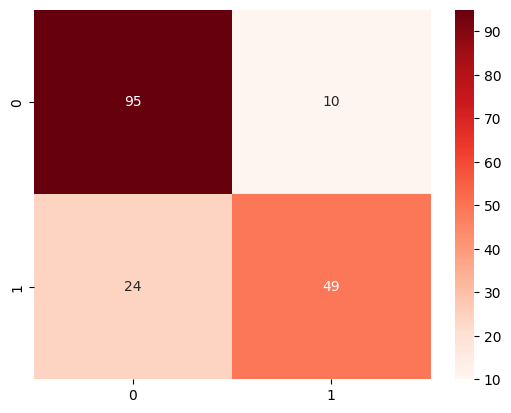

In [99]:
CM_knn = confusion_matrix(Y_test, y_pred_knn)
print("Confusion Matrix:\n", CM_knn)
sns.heatmap(CM_knn, annot= True, cmap= 'Reds')

##### Model Logistic Regression

Regresi logistik adalah algoritma machine learning untuk klasifikasi. Model ini menghitung probabilitas suatu data masuk ke dalam kelas tertentu. Algoritma ini bekerja dengan terlebih dahulu menghitung kombinasi linear dari fitur-fitur input, kemudian hasilnya dimasukkan ke dalam fungsi sigmoid. Fungsi sigmoid akan mengubah nilai tersebut menjadi angka antara 0 dan 1, yang diinterpretasikan sebagai probabilitas. Jika probabilitas lebih dari 0.5, maka data diklasifikasikan sebagai kelas 1, dan jika kurang dari atau sama dengan 0.5 maka diklasifikasikan sebagai kelas 0. Model ini belajar dengan menyesuaikan bobot (koefisien) melalui proses optimasi seperti gradient descent untuk meminimalkan kesalahan prediksi. 

In [100]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, Y_train)
y_pred_LR = model.predict(X_test_pca)
report_LR= classification_report(Y_test, y_pred_LR)

accuracy_LR = accuracy_score(Y_test, y_pred_LR)
print("Akurasi Klasifikasi:", accuracy_LR)
print("Laporan Klasifikasi:\n", report_LR)


Akurasi Klasifikasi: 0.8370786516853933
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.79      0.80        73

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



Confusion Matrix:
 [[91 14]
 [15 58]]


<Axes: >

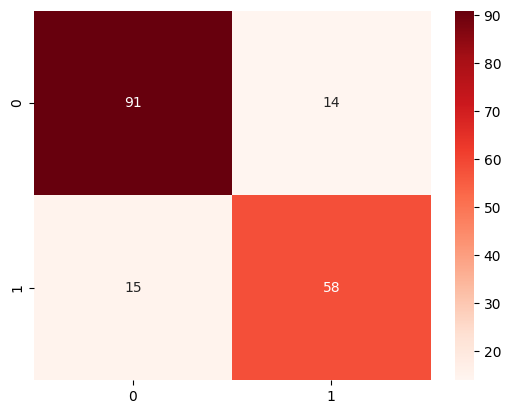

In [113]:
CM_LR = confusion_matrix(Y_test, y_pred_LR)
print("Confusion Matrix:\n", CM_LR)
sns.heatmap(CM_LR, annot= True, cmap= 'Reds')

##### Model Neural Network

Neural Network adalah algoritma pembelajaran mesin yang terinspirasi oleh cara kerja otak manusia, dengan struktur yang terdiri dari lapisan input, lapisan tersembunyi (hidden layers), dan lapisan output. Setiap neuron dihubungkan ke neuron lain dengan bobot yang dapat dipelajari. Input melalui neuron pertama akan diteruskan melalui jaringan, dan setiap bobot akan mempengaruhi hasil akhir. Output dihitung dengan melakukan operasi matematika (biasanya perkalian matriks) pada input dan bobot, kemudian melewati fungsi aktivasi untuk memperkenalkan non-linearitas.Proses pelatihan menggunakan metode seperti backpropagation untuk memperbarui bobot berdasarkan kesalahan prediksi.

In [102]:
mlp = MLPClassifier(hidden_layer_sizes=(6, 4), max_iter=1000, alpha=0.01, random_state=42)
mlp.fit(X_train, Y_train)
Y_pred_MLP = mlp.predict(X_test)
report_MLP = classification_report(Y_test, Y_pred_MLP)

accuracy_MLP = accuracy_score(Y_test, Y_pred_MLP)
print("Akurasi Klasifikasi:", accuracy_MLP)
print("Laporan Klasifikasi:\n", report_MLP)

Akurasi Klasifikasi: 0.8314606741573034
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       105
           1       0.88      0.68      0.77        73

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.83      0.83       178



Confusion Matrix:
 [[98  7]
 [23 50]]


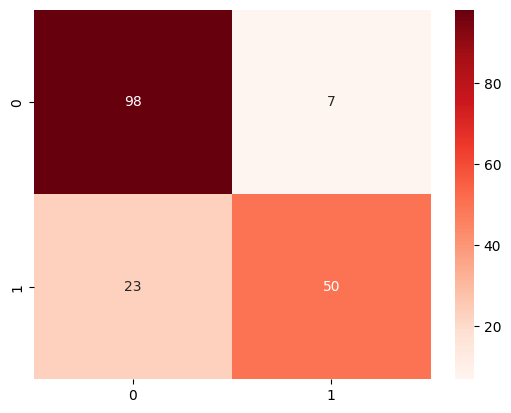

In [92]:
CM_MLP = confusion_matrix(Y_test, y_pred_MLP)
print("Confusion Matrix:\n", CM_MLP)
sns.heatmap(CM_MLP, annot=True, cmap='Reds')
plt.show()

### d. Berapa nilai Evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut

In [105]:
print(f"evaluasi model KNN: \n {report_knn}")
print(f"evaluasi model regresi logistik: \n {report_LR}")
print(f"evaluasi model Neural Network: \n {report_MLP}")

evaluasi model KNN: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.67      0.74        73

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.80       178

evaluasi model regresi logistik: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.79      0.80        73

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

evaluasi model Neural Network: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       105
           1       0.88      0.68      0.77        73

    accuracy                           0.83       178
   macro avg       0.84      0.81     

Metrik-metrik evaluasi :
1. Akurasi (Accuracy): Persentase prediksi yang benar dari total data.
2. Precision: Proporsi prediksi positif yang benar dari semua prediksi positif.
3. Recall (Sensitivity atau True Positive Rate): Proporsi data positif yang benar-benar terdeteksi sebagai positif.
4. F1-Score: Rata-rata harmonis antara Precision dan Recall.

### e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira kira apa yang memnyebabkan metode tersebut dapat memprediksi dataset anda dengan baik.

Regresi logistik memiliki accuracy tertinggi (84%), dan nilai precision, recall, serta f1-score yang stabil di antara kelas 0 dan 1. Ini menunjukkan bahwa model ini cukup konsisten dalam memprediksi kedua kelas, tidak terlalu bias ke salah satu.

## 4 EVALUASI

### a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang selamat?

In [107]:
print("Akurasi Klasifikasi:", accuracy_LR)
print("Laporan Klasifikasi:\n", report_LR)

Akurasi Klasifikasi: 0.8370786516853933
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.79      0.80        73

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



Berdasarkan  laporan diatas
- Precision untuk penumpang selamat adalah 0.86
- Recall untuk penumpang selamat adalah 0.73

b. Berapa banyak penumpang yang di prediksi selamat, dan berapa diantaranya benar-benar selamat?

In [109]:
# Jumlah yang diprediksi selamat (prediksi = 1)
jumlah_prediksi_selamat = np.sum(y_pred_LR == 1)

# Jumlah yang benar-benar selamat di antara prediksi = 1
jumlah_benar_selamat = np.sum((y_pred_LR == 1) & (Y_test == 1))

print(f"Jumlah penumpang yang diprediksi selamat: {jumlah_prediksi_selamat}")
print(f"Jumlah di antaranya yang benar-benar selamat: {jumlah_benar_selamat}")

Jumlah penumpang yang diprediksi selamat: 72
Jumlah di antaranya yang benar-benar selamat: 58
